### model 3 - Lesser Parameters

#### Target:
1. Same Skeleton as model 1
2. Make the model lighter by reducing the number of channels across the model for the assignment requirement

#### Results:
Total parameters: 9,446
Best Training Accuracy - 98.82 at the 15th Epoch
Best Testing Accuracy - 98.82 at the 14th epoch

#### Analysis:
1. Good model
2. Train and test discrepancy is less but is not consistent and around the last epoch the model looks to be little overfitting
3. The model is better,and much lighter than the earlier models, very less overfitting. 
4. we can proceed with this particular skeleton.

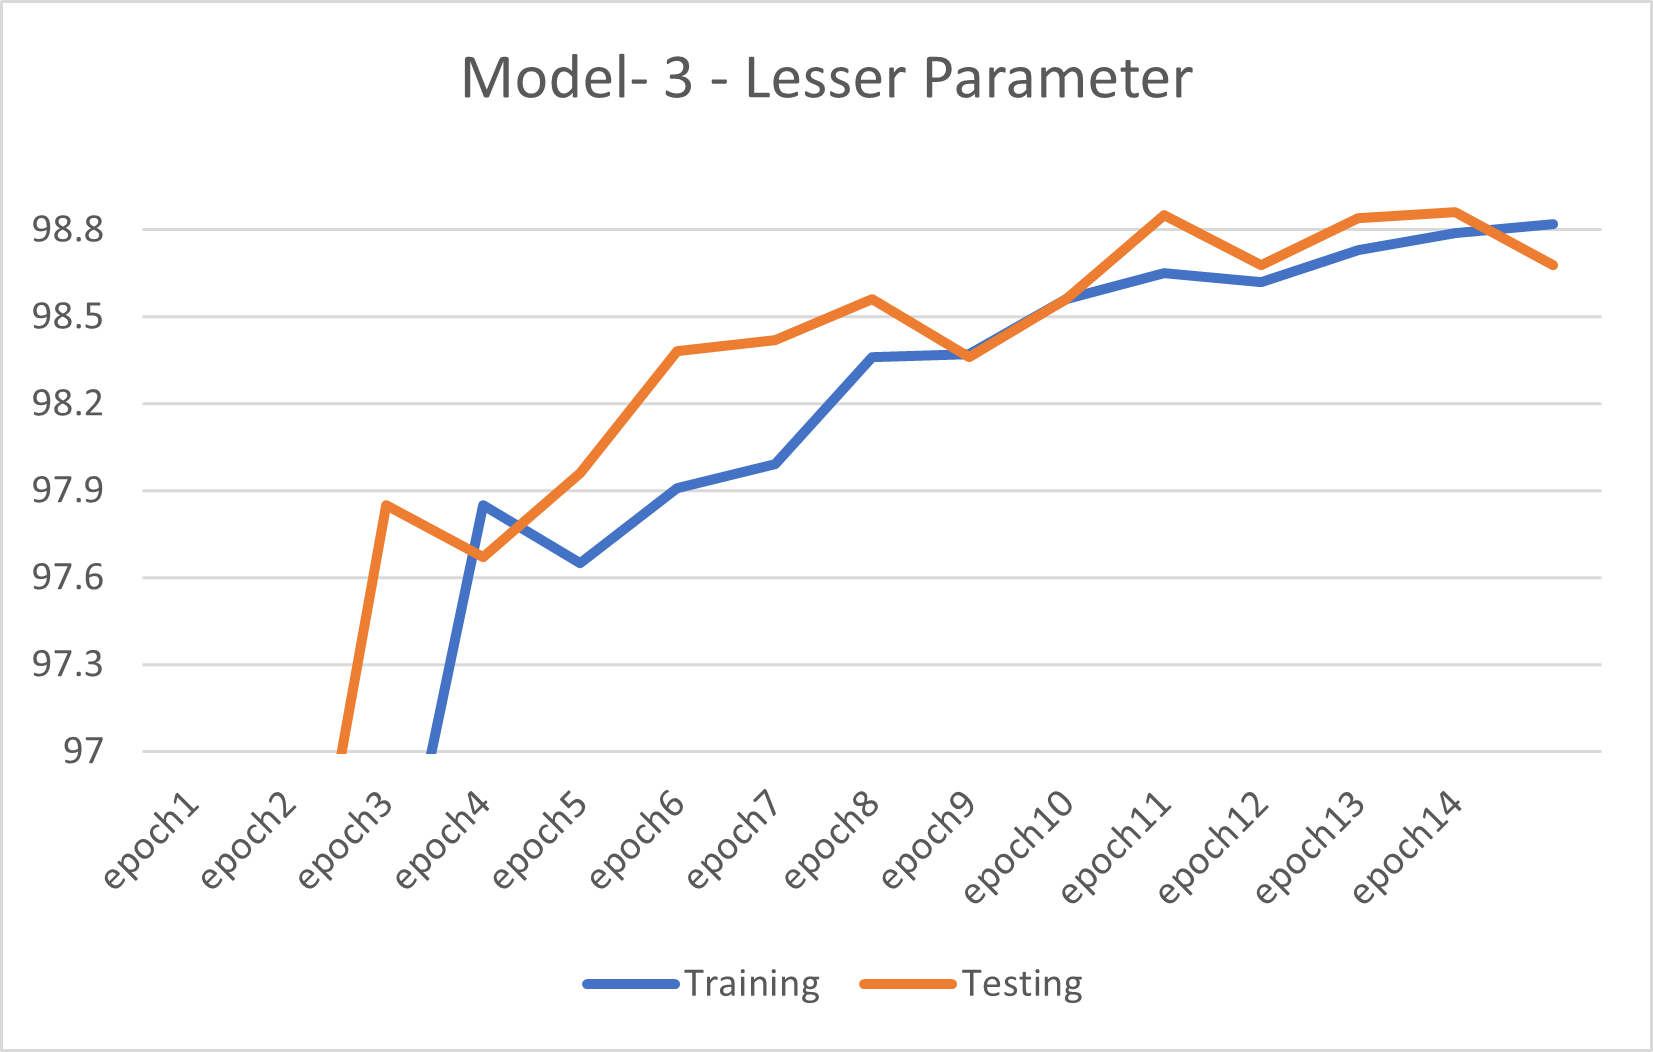

# Import Libraries


In [1]:
from __future__ import print_function
import torch
# import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from utils import train_test_dataloader
import models
from models import model_summary, train, test, plot_accuracy_loss, model3

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [2]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)


# Train data transformations
train_transformer = [transforms.RandomRotation((-7., 7.), fill=0),transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,)),]

# Test Phase transformations
test_transformer = [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train and test dataloader
train_loader,test_loader = train_test_dataloader(train_transformer, test_transformer, dataloader_args)

CUDA Available? True
Device:  cuda


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [3]:
# sending model to device
model = model3().to(device)

# Generating model summary
model_summary(model,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
              ReLU-2           [-1, 10, 28, 28]               0
            Conv2d-3           [-1, 12, 28, 28]           1,080
              ReLU-4           [-1, 12, 28, 28]               0
         MaxPool2d-5           [-1, 12, 14, 14]               0
            Conv2d-6           [-1, 10, 14, 14]             120
              ReLU-7           [-1, 10, 14, 14]               0
            Conv2d-8           [-1, 12, 12, 12]           1,080
              ReLU-9           [-1, 12, 12, 12]               0
           Conv2d-10           [-1, 16, 10, 10]           1,728
             ReLU-11           [-1, 16, 10, 10]               0
           Conv2d-12            [-1, 8, 10, 10]             128
             ReLU-13            [-1, 8, 10, 10]               0
           Conv2d-14             [-1, 1

# Let's Train and test our model

In [4]:
model =  model3().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=2.2910006046295166 Batch_id=468 Accuracy=13.75: 100%|██████████| 469/469 [00:19<00:00, 23.52it/s]



Test set: Average loss: 2.2912, Accuracy: 3481/10000 (34.81%)

EPOCH: 1


Loss=0.18050819635391235 Batch_id=468 Accuracy=87.27: 100%|██████████| 469/469 [00:21<00:00, 22.20it/s]



Test set: Average loss: 0.1228, Accuracy: 9599/10000 (95.99%)

EPOCH: 2


Loss=0.07027285546064377 Batch_id=468 Accuracy=96.25: 100%|██████████| 469/469 [00:21<00:00, 21.49it/s]



Test set: Average loss: 0.0697, Accuracy: 9785/10000 (97.85%)

EPOCH: 3


Loss=0.021057935431599617 Batch_id=468 Accuracy=97.25: 100%|██████████| 469/469 [00:22<00:00, 20.94it/s]



Test set: Average loss: 0.0688, Accuracy: 9767/10000 (97.67%)

EPOCH: 4


Loss=0.12084431201219559 Batch_id=468 Accuracy=97.65: 100%|██████████| 469/469 [00:22<00:00, 21.23it/s]



Test set: Average loss: 0.0650, Accuracy: 9796/10000 (97.96%)

EPOCH: 5


Loss=0.06392509490251541 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:21<00:00, 22.30it/s]



Test set: Average loss: 0.0497, Accuracy: 9838/10000 (98.38%)

EPOCH: 6


Loss=0.023322077468037605 Batch_id=468 Accuracy=97.99: 100%|██████████| 469/469 [00:21<00:00, 22.15it/s]



Test set: Average loss: 0.0510, Accuracy: 9842/10000 (98.42%)

EPOCH: 7


Loss=0.02637316845357418 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:22<00:00, 21.05it/s]



Test set: Average loss: 0.0433, Accuracy: 9856/10000 (98.56%)

EPOCH: 8


Loss=0.11660347133874893 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:22<00:00, 21.18it/s]



Test set: Average loss: 0.0483, Accuracy: 9836/10000 (98.36%)

EPOCH: 9


Loss=0.038381848484277725 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:21<00:00, 21.34it/s]



Test set: Average loss: 0.0425, Accuracy: 9856/10000 (98.56%)

EPOCH: 10


Loss=0.007556654512882233 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:20<00:00, 22.51it/s]



Test set: Average loss: 0.0354, Accuracy: 9885/10000 (98.85%)

EPOCH: 11


Loss=0.003124426119029522 Batch_id=468 Accuracy=98.62: 100%|██████████| 469/469 [00:21<00:00, 22.24it/s]



Test set: Average loss: 0.0383, Accuracy: 9868/10000 (98.68%)

EPOCH: 12


Loss=0.016037894412875175 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:21<00:00, 21.61it/s]



Test set: Average loss: 0.0349, Accuracy: 9884/10000 (98.84%)

EPOCH: 13


Loss=0.04227806627750397 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:21<00:00, 21.65it/s]



Test set: Average loss: 0.0323, Accuracy: 9886/10000 (98.86%)

EPOCH: 14


Loss=0.010661945678293705 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:22<00:00, 21.09it/s]



Test set: Average loss: 0.0408, Accuracy: 9868/10000 (98.68%)



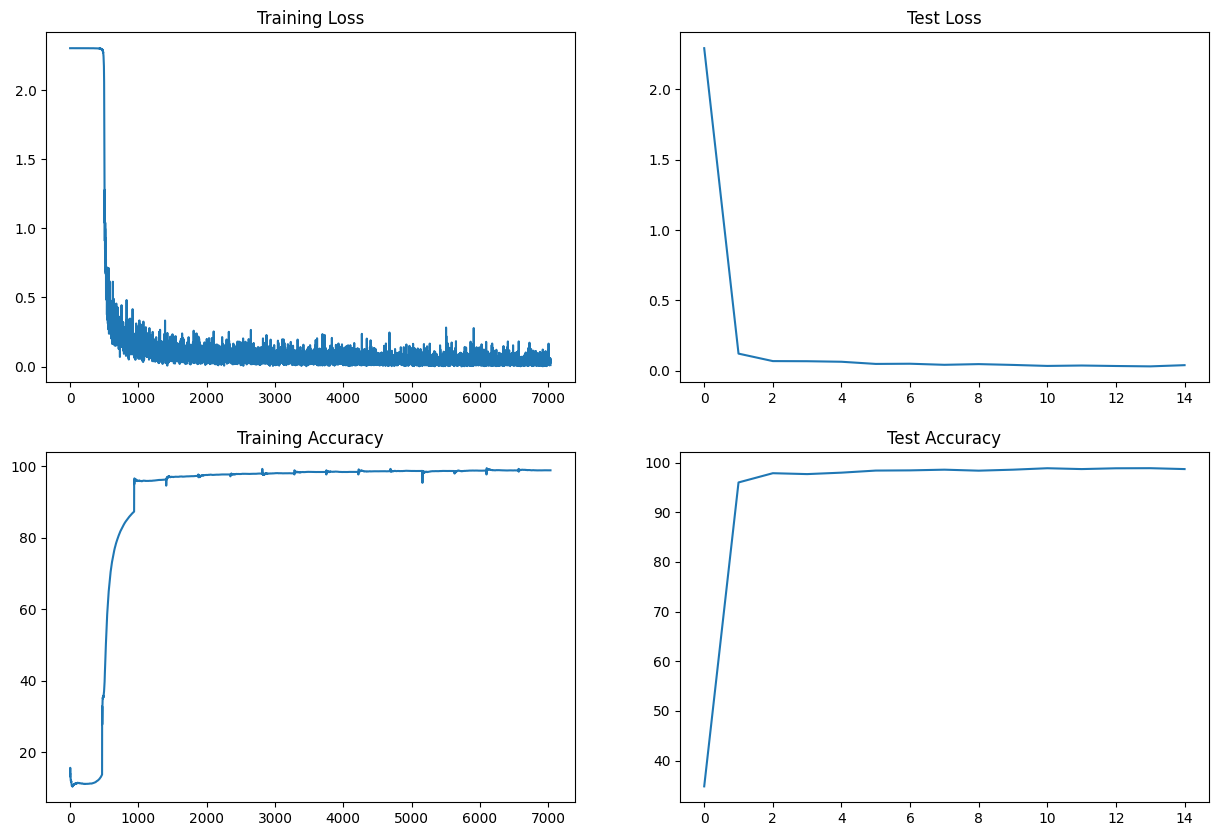

In [5]:
plot_accuracy_loss()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


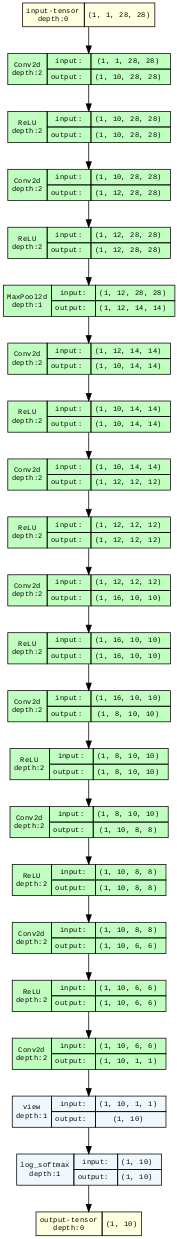

In [6]:
import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(model3(), input_size=(1,1,28,28), expand_nested=False)
model_graph.visual_graph